In [5]:
import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline

In [6]:
tech_stocks_df = pd.read_csv(
    Path("tech_stocks_closing_value_2018.csv"),
    index_col="Date", 
    parse_dates=True,
    infer_datetime_format=True)

tech_stocks_df.head()

,AAPL,MSFT,GOOG,FB,AMZN
Date,,,,,
2018-01-02,168.339050,84.128128,1065.000000,181.419998,1189.010010
2018-01-03,168.309738,84.519646,1082.479980,184.669998,1204.199951
2018-01-04,169.091522,85.263542,1086.400024,184.330002,1209.589966
2018-01-05,171.016678,86.320648,1102.229980,186.850006,1229.140015
2018-01-08,170.381485,86.408737,1106.939941,188.279999,1246.869995


In [7]:
# Calculate daily returns using Pandas ‘pct_change’  and ‘dropna’
daily_returns = tech_stocks_df.pct_change().dropna()

# Display sample data
daily_returns.head()

,AAPL,MSFT,GOOG,FB,AMZN
Date,,,,,
2018-01-03,-0.000174,0.004654,0.016413,0.017914,0.012775
2018-01-04,0.004645,0.008801,0.003621,-0.001841,0.004476
2018-01-05,0.011385,0.012398,0.014571,0.013671,0.016163
2018-01-08,-0.003714,0.001020,0.004273,0.007653,0.014425
2018-01-09,-0.000115,-0.000680,-0.000614,-0.002178,0.004676


In [8]:
# Calculate the standard deviation for each of the tech stocks
# call the Pandas `std` function on the `daily_returns` DataFrame
standard_deviation1 = daily_returns.std()

# Display results
standard_deviation.head()

NameError: name 'standard_deviation' is not defined

In [9]:
# Sort the standard deviation values using Pandas 'sort_values' function
standard_deviation_sorted = standard_deviation1.sort_values()

# Display results
standard_deviation_sorted


GOOG    0.017724
MSFT    0.017839
AAPL    0.018106
AMZN    0.022768
FB      0.023949
dtype: float64

### GOOG is the smallest and FB is the largest standard deviation. 
### This can also be seen as GOOG being the smallest risk stock and FB beeing the largest risk stock.

# Find the Annualized Standard Deviation
### We’ll calculate the annualized standard deviation (std) by using the numbers we just generated from the daily returns. To do this, we need to multiply the square root of the number of trading days in a year by the standard deviation, as the following formula shows:

### annualized std = std × √ of the number of trading days in a year

random example of different trading days calanders: http://www.swingtradesystems.com/trading-days-calendars.html

In [10]:
# Calculate the annualized standard deviation, using the standard_deviation
# from the daily_returns DataFrame multiplied by the square root (np.sqrt)
# of the number of trading days in a year (252)
annualized_standard_deviation = standard_deviation1 * np.sqrt(252)

# Display the sorted results
annualized_standard_deviation.sort_values()

GOOG    0.281354
MSFT    0.283180
AAPL    0.287428
AMZN    0.361434
FB      0.380172
dtype: float64

### If you use the monthly return data, the standard deviation will be multiplied by the square root of 12—which is the number of months in a year. 
### Therefore, the formula is 
# `annualized_std_dev=monthly_std_dev * np.sqrt(12)`

<AxesSubplot:title={'center':'Box Plot of Daily Returns Data - 5 Tech Stocks'}>

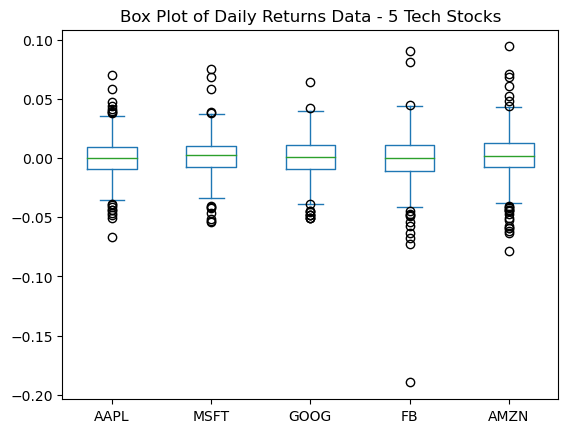

In [11]:
# Create a Pandas box plot from the `daily_returns` DataFrame
daily_returns.plot.box(title="Box Plot of Daily Returns Data - 5 Tech Stocks")

# Skill Drill - Different Example from above

In [12]:
stocks = pd.DataFrame({
    'stock_abc' : [17.89, 16.43, 16.25, 15.74, 15.36, 18.29, 18.00, 18.15, 18.30, 18.50],
    'stock_def' : [124.37, 125.21, 125.75, 126.51, 127.25, 127.00, 127.10, 126.89, 126.99, 127.75],
    'stock_efg' : [5.45, 5.50, 5.75, 5.10, 4.90, 4.75, 4.70, 4.80, 4.29, 4.33]
})

In [13]:
# Create a daily_returns DataFrame by using the pct_change and dropna functions.
daily_returns2_df = stocks.pct_change().dropna()
daily_returns2_df.head()

,stock_abc,stock_def,stock_efg
1,-0.081610,0.006754,0.009174
2,-0.010956,0.004313,0.045455
3,-0.031385,0.006044,-0.113043
4,-0.024142,0.005849,-0.039216
5,0.190755,-0.001965,-0.030612


In [14]:
# Use the Pandas mean function to find the average daily return of each stock in the daily_returns DataFrame.
daily_returns2_mean = daily_returns2_df['stock_abc'].mean()
daily_returns2_mean

0.0060371080502231965

In [15]:
# Use the Pandas mean function to find the average daily return of each stock in the daily_returns DataFrame.
daily_returns2_mean = daily_returns2_df['stock_def'].mean()
daily_returns2_mean

0.002989244729006314

In [16]:
# Use the Pandas mean function to find the average daily return of each stock in the daily_returns DataFrame.
daily_returns2_mean = daily_returns2_df['stock_efg'].mean()
daily_returns2_mean

-0.02382425141921902

In [17]:
# Use the Pandas std and sort_values functions to determine the stocks with the smallest and largest standard deviations.
standard_deviation = daily_returns2_df.std()
standard_deviation.head()

stock_abc    0.074930
stock_def    0.003503
stock_efg    0.055040
dtype: float64

In [18]:
standard_deviation_sort = standard_deviation.sort_values()
standard_deviation_sort

stock_def    0.003503
stock_efg    0.055040
stock_abc    0.074930
dtype: float64

In [19]:
# Calculate the annualized standard deviation, using the standard_deviation
# from the daily_returns DataFrame multiplied by the square root (np.sqrt)
# of the number of trading days in a year (252)
annualized_standard_deviation = standard_deviation_sort * np.sqrt(252)

# Display the sorted results
annualized_standard_deviation.sort_values()

stock_def    0.055613
stock_efg    0.873733
stock_abc    1.189478
dtype: float64